# Test 2b - Merge, Aggregate, Visualize

## Introduction

This problem tests your ability to merge, aggregate, and visualize data.
You'll work with realistic business data to answer questions about product profitability.

Before submitting, ensure your notebook:

- Includes your verification info (Banner ID and code) as the first cell
- Runs completely with "Kernel → Restart & Run All"
- Shows your work (don't just print final answers)
- Includes your interpretation responses at the end

## Dataset: Bean & Brew Coffee Shop

You've been hired to analyze sales data for Bean & Brew, a local coffee shop chain with three locations. The owner wants to understand which products are most profitable and how profitability varies across locations.

There are two data files:

- `sales.csv` - Individual transaction records
  - `transaction_id`: Unique transaction identifier
  - `timestamp`: Date and time of purchase (format: 'YYYY-MM-DD HH:MM:SS')
  - `location`: Store location ('Downtown', 'Campus', 'Suburb')
  - `product_id`: Product identifier (links to products table)
  - `quantity`: Number of units sold
  - `revenue`: Total revenue from transaction
  - `payment_method`: Payment type ('Cash', 'Credit', 'Mobile')
  - `loyalty_member`: Boolean indicating if customer is loyalty program member
- `products.csv` - Product catalog
  - `product_id`: Unique product identifier
  - `name`: Product name
  - `category`: Product category ('Coffee', 'Tea', 'Pastry', 'Sandwich')
  - `cost`: Cost to make/acquire one unit (for profit calculation)

The dataset contains two weeks of sales data (approximately 3,000 transactions) across 18 products. It includes both regular and premium items in each category.

We are interested in learning which product categories generate the most profit, and how does profitability vary across locations? Complete the following tasks to answer those questions and more.

## Scoring

Total: 30 points (+ 5 bonus)

- Tasks 1-6: 18 points
- Interpretation (Questions 1-4): 12 points
- Bonus: 5 points (optional)

## Generate Your Dataset

Before starting the analysis, you need to generate your unique dataset using your Banner ID.

1. Open a terminal in the folder containing `generate_test2b_data.py`
2. Activate your conda virtual environment
3. Run: `python generate_test2b_data.py`
4. Enter your 9-digit Banner ID when prompted (you'll enter it twice to confirm)

The script will create two files in the `data/` folder:

- `data/products.csv` - Product catalog
- `data/sales.csv` - Transaction records

Important: At the end, the script displays a verification block like this:

```
======================================================================
DATA VERIFICATION INFORMATION
======================================================================
banner id:          904123456
verification code:  5e0dXXXXXXXX
======================================================================
```

Copy the banner id and verification code lines and paste them into the cell below. This is required for submission.

```
paste your banner id and verification code here...
banner id:          904168426
verification code:  f047f7e3921b

```

## Setup: Load the Data

Run the cell below to load the data. The code is provided for you.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data (provided)
sales = pd.read_csv('data/sales.csv', parse_dates=['timestamp'])
products = pd.read_csv('data/products.csv')

print(f"Sales: {len(sales)} transactions")
print(f"Products: {len(products)} items in catalog")
print()
print("Sales preview:")
sales.head()

Sales: 2712 transactions
Products: 18 items in catalog

Sales preview:


,transaction_id,timestamp,location,product_id,quantity,revenue,payment_method,loyalty_member
0,1001,2025-11-10 06:09:00,Campus,103,1.0,4.07,Mobile,True
1,1000,2025-11-10 06:17:00,Downtown,105,1.0,4.30,Mobile,True
2,1003,2025-11-10 06:31:00,Downtown,114,1.0,5.43,Credit,False
3,1002,2025-11-10 06:48:00,Campus,105,1.0,3.46,Mobile,False
4,1004,2025-11-10 07:05:00,Campus,111,1.0,3.19,Mobile,False


In [2]:
# Products catalog
products

,product_id,name,category,cost
0,101,Espresso,Coffee,1.2
1,102,Cappuccino,Coffee,1.8
2,103,Latte,Coffee,1.9
3,104,Americano,Coffee,1.0
4,105,Cold Brew,Coffee,1.5
5,106,Nitro Cold Brew,Coffee,2.5
6,107,Green Tea,Tea,0.8
7,108,Chai Latte,Tea,1.2
8,109,Herbal Tea,Tea,0.7
9,110,Premium Matcha,Tea,2.2


## Task 1: Data Quality Check

Investigate the sales data quality and coverage. Your code should answer the following questions:

1. How many missing values are in each column?
2. How many unique product IDs appear in the sales data? Compare this to the catalog size.
3. What is the date range (earliest and latest transaction)?

### Your Code

In [7]:
# Task 1: use isna(), nunique(), min/max on timestamp

import pandas as pd

# Count missing values in each column
missing_vals = sales.isna().sum()
print(missing_vals)

#Number unique Products
unique_products = sales["product_id"].nunique()

# Total catalog size
catalog_size = products['product_id'].nunique()

print(f"Unique products in sales:{ unique_products}.")
print(f"Catalog Size: {catalog_size}.")

#Date Range
earliest = sales['timestamp'].min()
latest = sales['timestamp'].max()

print(f"Earliest: {earliest}")
print(f"Latest: {latest}")



transaction_id    0
timestamp         0
location          0
product_id        0
quantity          6
revenue           4
payment_method    0
loyalty_member    0
dtype: int64
Unique products in sales:21.
Catalog Size: 18.
Earliest: 2025-11-10 06:09:00
Latest: 2025-11-23 21:00:00


## Task 2: Merge Sales with Products

Merge the sales and products DataFrames to add product information (name, category, cost) to each transaction.

### Your Code

In [8]:
# Task 2: use pd.merge() with appropriate join type
sales_products = pd.merge(
    sales,
    products[['product_id', 'name', 'category', 'cost']],
    on='product_id',   
    how='left'    
)

print(sales_products.head())


   transaction_id           timestamp  location  product_id  quantity  \
0            1001 2025-11-10 06:09:00    Campus         103       1.0   
1            1000 2025-11-10 06:17:00  Downtown         105       1.0   
2            1003 2025-11-10 06:31:00  Downtown         114       1.0   
3            1002 2025-11-10 06:48:00    Campus         105       1.0   
4            1004 2025-11-10 07:05:00    Campus         111       1.0   

   revenue payment_method  loyalty_member           name category  cost  
0     4.07         Mobile            True          Latte   Coffee   1.9  
1     4.30         Mobile            True      Cold Brew   Coffee   1.5  
2     5.43         Credit           False  Cinnamon Roll   Pastry   1.4  
3     3.46         Mobile           False      Cold Brew   Coffee   1.5  
4     3.19         Mobile           False      Croissant   Pastry   1.0  


## Task 3: Verify the Merge

After merging, verify that the merge worked correctly:

1. Compare the shape of the merged DataFrame to the original sales data
2. Check if any rows have missing values in the product columns (name, category, cost)
3. If there are missing values, identify which product_id(s) are causing the problem

### Your Code

In [15]:
# Task 3: Verify merge correctness

# Shapes
sales_shape = sales.shape
merge_shape = sales_products.shape

print(f"Original sales shape: {sales_shape}")
print(f"Merged DataFrame shape: {merge_shape}")

# Missing values in product columns
prod_missing = sales_products[['name', 'category', 'cost']].isna().sum()
print("Missing values product columns:")
print(prod_missing)

# Rows with missing product info
prod_rows = sales_products[sales_products[['name', 'category', 'cost']].isna().any(axis=1)]
print("Rows with missing product info:")
print(prod_rows.head())

# Problem product IDs
prod_ids = prod_rows['product_id'].unique()
print("Problem product IDs:")
print(prod_ids)



Original sales shape: (2712, 8)
Merged DataFrame shape: (2712, 12)
Missing values product columns:
name        11
category    11
cost        11
dtype: int64
Rows with missing product info:
      transaction_id           timestamp  location  product_id  quantity  \
161             1162 2025-11-10 15:02:00    Campus         199       1.0   
550             1518 2025-11-12 12:59:00  Downtown         201       1.0   
564             1556 2025-11-12 13:26:00    Suburb         199       1.0   
1050            2050 2025-11-14 13:17:00  Downtown         201       1.0   
1146            2147 2025-11-14 18:18:00    Campus         199       1.0   

      revenue payment_method  loyalty_member name category  cost  profit  
161      3.02         Credit           False  NaN      NaN   NaN     NaN  
550     12.06           Cash           False  NaN      NaN   NaN     NaN  
564      8.60         Credit            True  NaN      NaN   NaN     NaN  
1050     9.50         Credit            True  NaN     

## Task 4: Profit by Category

First, calculate profit for each transaction: `profit = revenue - (cost × quantity)`

Then summarize profitability by product category. Your code should return a table that shows both total profit and number of transactions for each category. Sort it by total profit (highest first).

### Your Code

In [16]:
# Task 4: create profit column, then groupby with .agg()
# Calculate profit 
sales_products['profit'] = sales_products['revenue'] -(sales_products['cost'] * sales_products['quantity'])

# Summarize by category
category_summary = (sales_products.groupby('category').agg(total_profit=('profit', 'sum'),transaction_count=('profit', 'count')
    ).sort_values('total_profit', ascending=False))

print("Profitability by product category:")
print(category_summary)

Profitability by product category:
          total_profit  transaction_count
category                                 
Sandwich       4141.40                578
Coffee         2472.01                995
Pastry         1527.88                529
Tea             883.86                589


## Task 5: Profit by Category and Location

Analyze how profitability varies by both category and location. Your code should produce a table that shows the following for every combination of category and location:

- Total profit
- Average profit per transaction
- Number of transactions

Display the results as a flat table (i.e., without a nested/hierarchical index).

### Your Code

In [11]:
# Task 5: groupby multiple columns, .agg() with dict, reset_index()

cat_table = sales_products.groupby(['category','location']).agg({'profit':['sum','mean','count']}).reset_index()
cat_table.columns = ['category','location','total_profit','avg_profit','transaction_count']

print("Profitability by category and location:")
print(cat_table)



Profitability by category and location:
    category  location  total_profit  avg_profit  transaction_count
0     Coffee    Campus       1155.80    2.056584                562
1     Coffee  Downtown       1102.05    3.113136                354
2     Coffee    Suburb        214.16    2.710886                 79
3     Pastry    Campus        591.14    2.494262                237
4     Pastry  Downtown        545.54    3.474777                157
5     Pastry    Suburb        391.20    2.897778                135
6   Sandwich    Campus        615.14    5.349043                115
7   Sandwich  Downtown       2524.33    7.988386                316
8   Sandwich    Suburb       1001.93    6.815850                147
9        Tea    Campus        194.24    1.199012                162
10       Tea  Downtown        316.90    1.810857                175
11       Tea    Suburb        372.72    1.479048                252


## Task 6: Visualize Category Profitability

Create a bar chart showing total profit by product category. Use seaborn and ensure that the result:

- Has clearly labeled categories
- Includes a descriptive title
- Makes it clear which category is most/least profitable

### Your Code

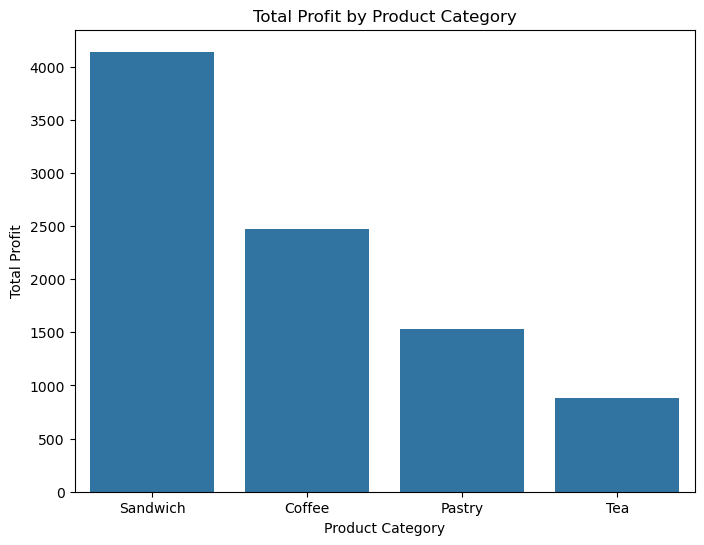

In [14]:
# Task 6: use sns.barplot() with aggregated data

# Aggregate total profit by category and plot with seaborn

import seaborn as sns
import matplotlib.pyplot as plt

cat_table = sales_products.groupby('category')['profit'].sum().reset_index()

plt.figure(figsize=(8,6))
sns.barplot(
    #defines data sources
    data=cat_table,
    x='category',
    y='profit',
    #Organizies values for table
    order=cat_table.sort_values('profit', ascending=False)['category']
)
#Copilot was used for this. Labels axis and plot
plt.title('Total Profit by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Profit')

plt.show()


## Interpretation

Concisely answer the following questions based on your analysis.


1. What might go wrong if you did not verify the merge in Task 3 before proceeding with the analysis?
2. In Tasks 4 and 5, you aggregated data at different levels of detail (by category, then by category and location). How did this change what you could learn from the data?
3. Reflect on the patterns you discovered in your analysis. What valuable insights did your work generate?
4. The coffee shop owner asks: "Based on your analysis, what's the single most important thing I should do to improve profitability?" Provide a specific, actionable recommendation. Justify your recommendation with evidence from your analysis (include specific numbers from your results). Also, suggest additional analysis that you feel might be worthwhile.

### Your Answers

*Interpretation responses here*

1. If I did not verify the merge before proceeding there could be problems such as merging with the wrong join function. This would result in some needed data being lost. There could also have been duplicated columns if the wrong key was used.
2. Task 4 was more of a high-level overview of the data. It resulted in an output that sacrificed detail for large overall conclusions about what the most profitable products are. Task 5 was different because it provided an extra layer of information in a location by location breakdown of what makes the most money there. So task 4 is more geared towards the "coffee chains" objectives and task 5 is better for "local" objectives.
3. The most obvious pattern to me is a cycle of summarization into tables followed by analysis. You take the data as a whole, check for issues, structure the part you want, check for issues again, and then analyze it. In terms of the data here key insights include that sandwiches are the most profitable item to produce, plots are the best way to visualize the key results, and it is important to analyze data from multiple perspectives in order to get a more full picture of what the data is saying.
4. It may be worthwhile to conduct a study on the time of day that each product type is sold. Another useful analysis could focus on the types of products loyalty members are most interested in, so that future promotions can target these items to attract more members. It may also be worth investigating why product IDs 199 and 201 were entered multiple times even though they are not in the catalog. I think the best strategy for the owner is to try bundling sandwiches and coffee into “value meals,” so that customers are encouraged to buy multiple items. On campus, for example, coffee is purchased 562 times while sandwiches are purchased 115 times. Since sandwiches offer the highest profit margin at $5.35, it would greatly benefit the owner to sell more of them. Therefore, it may be worthwhile to accept $1 or $2 less profit on sandwiches when they are bought with a coffee. Another option would be to run coffee‑based promotions for loyalty members on campus

## Bonus: Time-Based Analysis (Optional)

For extra credit, investigate a time-based question of your choosing. Examples of questions you could explore include:

- Do sales patterns differ between weekdays and weekends?
- Which hours are busiest at each location?
- Is there a day of the week that stands out for profitability?

For full credit you must:

- State your question clearly
- Show your analysis code
- Summarize what you found in 2-3 sentences

In [ ]:
# Bonus: Your time-based analysis here


### Your Findings

*Bonus findings here (state your question and what you discovered)*

## Submission

Ensure your notebook:

- Has the verification block (Banner ID and code) as the first cell
- Runs completely from top to bottom without errors
- Shows all task outputs clearly
- Includes all interpretation responses
- Is saved and committed to your repository

Follow the submission instructions on Canvas to submit your work.